# SOCR - Heights/Weights ML Project

The objective of this project is to develop a predictor to predict weights as function of height of different people using different regression models. This project serves as an introductory regression projects where there is 1 feature (heights) and 1 target variable (weights).

Data Source: http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights

In [2]:
# Import all packages needed for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import r2_score

In [4]:
# Function that loads data in pandas and check for missing numerical data
def loadData(dataFile, fileExtension='.csv'):
    # Load data from file as DataFrame
    data = None  # initialize data
    if fileExtension == '.csv':
        data = pd.read_csv(dataFile)
    elif fileExtension == '.xlsx':
        data = pd.read_excel(dataFile)

    # Peek into data set
    print(data.head(10))
    print('\n')

    # Look at information in data set
    print(data.info())
    print('\n')

    # Look at information in data set
    print(data.describe())
    print('\n')

    # Check for missing data, if any
    if not (data.isna().any().any()):
        print('There is no missing data!')
    else:
        print('Check for missing data!')

    return data

In [5]:
# Load full data set
fileName = 'heights_weights.xlsx'
dataFull = loadData(fileName, '.xlsx')

   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971
5      6        68.69784        123.3024
6      7        69.80204        141.4947
7      8        70.01472        136.4623
8      9        67.90265        112.3723
9     10        66.78236        120.6672


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB
None


              Index  Height(Inches)  Weight(Pounds)
count  25000.000000    25000.000000    25000.000000
mean   12500.500000       67.993114      127.079421

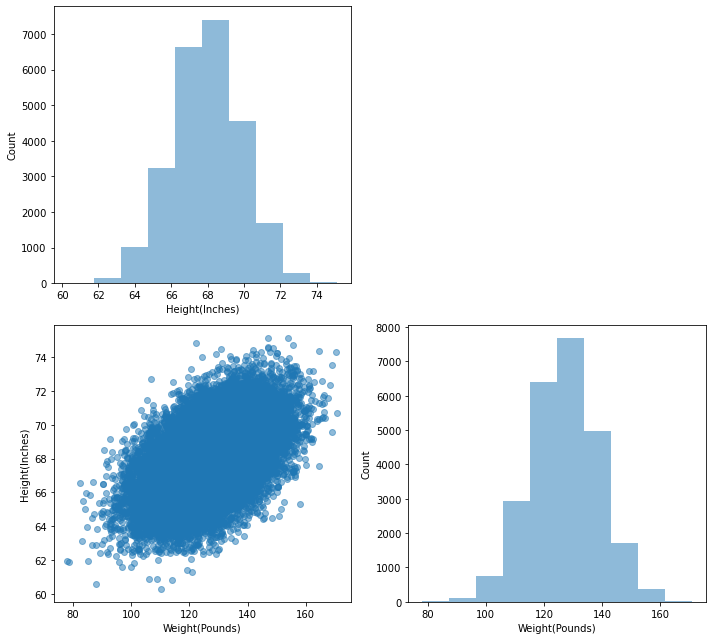

In [6]:
# Extract columns from data set
columnNames = dataFull.columns
columnNames = columnNames[1:] # remove Index data

# Plot full set of data
scatterplotmatrix(dataFull[columnNames].values, figsize=(10, 9),
                  names=columnNames, alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:
# Specify feature and target variables
X = dataFull[columnNames[0]].values  # height
y = dataFull[columnNames[1]].values  # weight

In [8]:
# Split data into training (80%)/test data (20%) sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
y_test = y_test[:, np.newaxis]

In [9]:
# Scale training data
scale = StandardScaler()
X_train_std = scale.fit_transform(X_train)
y_train_std = scale.fit_transform(y_train)

# Scale test data
X_test_std = scale.fit_transform(X_test)
y_test_std = scale.fit_transform(y_test)

In [10]:
# Choose the best model for training data
estimators = {
    'LinearRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items():
    kFold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=X_train_std,
                             y=y_train_std, cv=kFold, scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.250
      ElasticNet: mean of r2 scores=0.000
           Lasso: mean of r2 scores=-0.000
           Ridge: mean of r2 scores=0.250


It appears that LinearRegression and Ridge estimators are more suited for training the data. Let's apply the LinearRegression model first

In [15]:
# Fit training data to linear model
lin_reg = LinearRegression()
lin_reg.fit(X_train_std, y_train_std)
print(f'Slope: {lin_reg.coef_[0][0]:.4f}')
print(f'Intercept: {"{:.4e}".format(lin_reg.intercept_[0])}')

Slope: 0.5009
Intercept: 1.2540e-15


The values of the slope and intercept are smaller due to the fact that the training/test data has been normalized using the StandardScaler() function. Now let's calculate linear predictor and apply the test data, and then compute the R^2 score.

# Generate linear fit predictor using test data
predictor_linReg = lin_reg.predict(X_test_std)

In [17]:
# Compute R^2 from linear regression model
r2_val = r2_score(X_test_std, predictor_linReg)
print(f'R^2 score:  {r2_val:.4f}')

R^2 score:  0.7509


The R^2 score is 0.75....which is not too bad.

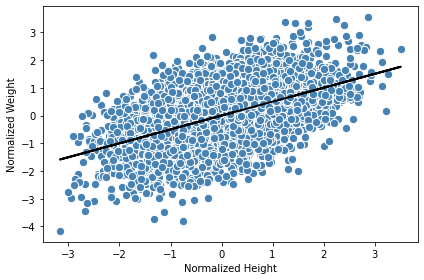

In [20]:
# Plot scatter plot of data
def plotData(XFeat, yTarget, yPredictor):
    plt.xlabel('Normalized Height')
    plt.ylabel('Normalized Weight')
    plt.scatter(XFeat, yTarget, c='steelblue', edgecolor='white', s=70)
    plt.plot(XFeat, yPredictor, color='black', lw=2)
    plt.tight_layout()
    plt.show()
    return None

# Plot normalized data with predictor
plotData(X_test_std, y_test_std, predictor_linReg)

Now let's apply the Ridge regressor model and compute the R^2 score

In [21]:
# Apply Ridge model
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_train_std, y_train_std)
predictor_ridgeReg = ridge_reg.predict(X_test_std)
r2_val = r2_score(X_test_std, predictor_ridgeReg)
print(f'R^2 score:  {r2_val:.4f}')

R^2 score:  0.7509


The Ridge model also has a R^2 score of 0.75